In [ ]:
import pandas as pd
import numpy as np

In [ ]:
class K_means():
  def __init__(self,X,K,max_iters):
    self.K = K
    self.X = X
    self.max_iters = max_iters
    self.n, self.m = np.shape(X)

  def init_centroids(self):
    random_indices = np.random.choice(self.n,size=self.K,replace=False)
    self.centroids = self.X[random_indices,:]

  def computeCentroids(self,closest_centroid):
    for k in range(self.K):
      sum_x,sum_y,sum_z,count = 0,0,0,0

      for i in range(self.n):
        if closest_centroid[i]==k:
          sum_x += self.X[i][0]
          sum_y += self.X[i][1]
          sum_z += self.X[i][2]
          count += 1
      if count==0:
        count = 1
      
      centroids[k][0] = sum_x/count
      centroids[k][1] = sum_y/count
      centroids[k][2] = sum_z/count

    return centroids

  def findClosestCentroids(self):
    no_of_centroids = self.K
    closest_centroid = np.zeros(self.n)

    for i in range(self.n):
      dist = float('inf')
      idx = -1
      for k in range(self.K):
        temp = np.sqrt(np.sum(np.power(self.X[i,:]-self.centroids[k,:],2)))
        if temp<dist:
          dist = temp
          idx = k
          
      closest_centroid[i] = idx

    return closest_centroid
  

  def run(self):
    self.init_centroids()

    closest_centroids = np.zeros(self.n)
    
    for i in range(self.max_iters):
      print('Iteration:',str(i+1)+'/'+str(self.max_iters))
      closest_centroids = self.findClosestCentroids()
      self.centroids = self.computeCentroids(closest_centroids)
      
    
    return (self.centroids,closest_centroids)

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

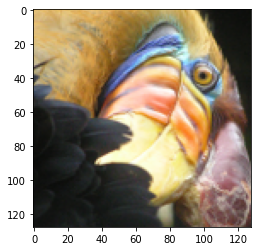

In [ ]:
image = mpimg.imread('/content/drive/MyDrive/bird_small.png')
plt.imshow(image)

In [ ]:
image = image/255
image_size = np.shape(image)

In [ ]:
X = np.reshape(image,(image_size[0]*image_size[1],3))
K = 8
max_iters = 10

In [ ]:
import time
start_time = time.time()

model = K_means(X,K,max_iters)
centroids,closest_centroid = model.run()

print(time.time()-start_time)

Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10
17.535881996154785


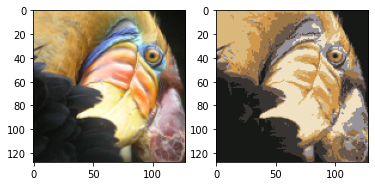

In [ ]:
closest_centroid = closest_centroid.astype('int')
X_reduced = centroids[closest_centroid,:]
X_reduced = np.reshape(X_reduced,(image_size[0],image_size[1],3))

f, ax = plt.subplots(1,2)
ax[0].imshow(image*255)
ax[1].imshow(X_reduced*255)